In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/dts-itb03k02.csv"
dataset = pd.read_csv(url)
dataset.head()

,Kota,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan),Tujuan Bersepeda (secara singkat)
0,madiun,45,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike),olah raga
1,Pekalongan,50,Pria,166,80,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike),Menggerakkan badan ( olah raga) dalam jarak de...
2,Surabaya,43,Pria,178,73,Cepat (26 km/jam atau lebih),Jalanan Rata,Sepeda Balap (Road Bike),Kesehatan
3,Surabaya,40,Wanita,165,53,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike),berolahraga
4,surabaya,32,Wanita,155,68,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike),mengusir bosan


In [33]:
# Select appropriate columns
dataset = dataset[['Usia (tahun)', 'Jenis Kelamin', 'Tinggi Badan (dalam cm)', 'Berat Badan (dalam kg)', 'Kecepatan Bersepeda', 'Jenis Permukaan Jalan (yang paling sering dilalui)', 'Jenis Sepeda (yang paling sering digunakan)']]
dataset.head()

,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan)
0,45,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike)
1,50,Pria,166,80,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike)
2,43,Pria,178,73,Cepat (26 km/jam atau lebih),Jalanan Rata,Sepeda Balap (Road Bike)
3,40,Wanita,165,53,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike)
4,32,Wanita,155,68,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike)


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Usia (tahun)                                        498 non-null    object
 1   Jenis Kelamin                                       498 non-null    object
 2   Tinggi Badan (dalam cm)                             498 non-null    object
 3   Berat Badan (dalam kg)                              498 non-null    object
 4   Kecepatan Bersepeda                                 498 non-null    object
 5   Jenis Permukaan Jalan (yang paling sering dilalui)  498 non-null    object
 6   Jenis Sepeda (yang paling sering digunakan)         498 non-null    object
dtypes: object(7)
memory usage: 27.4+ KB


In [35]:
dataset.describe()

,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan)
count,498,498,498,498,498,498,498
unique,95,2,55,81,3,2,3
top,40,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Gunung (Mountain Bike/MTB)
freq,22,385,48,31,270,397,284


In [36]:
# Check null and missing data
missing = dataset.isnull().sum()
print("Missing:")
print(missing)

print()

zero = (dataset == 0).sum()
print("Zeros: ")
print(zero)

Missing:
Usia (tahun)                                          0
Jenis Kelamin                                         0
Tinggi Badan (dalam cm)                               0
Berat Badan (dalam kg)                                0
Kecepatan Bersepeda                                   0
Jenis Permukaan Jalan (yang paling sering dilalui)    0
Jenis Sepeda (yang paling sering digunakan)           0
dtype: int64

Zeros: 
Usia (tahun)                                          0
Jenis Kelamin                                         0
Tinggi Badan (dalam cm)                               0
Berat Badan (dalam kg)                                0
Kecepatan Bersepeda                                   0
Jenis Permukaan Jalan (yang paling sering dilalui)    0
Jenis Sepeda (yang paling sering digunakan)           0
dtype: int64


In [37]:
# Encode data
encoder = LabelEncoder()
dataset['Encoded Gender'] = encoder.fit_transform(dataset['Jenis Kelamin'])
dataset['Encoded Speed'] = encoder.fit_transform(dataset['Kecepatan Bersepeda'])
dataset['Encoded Surface'] = encoder.fit_transform(dataset['Jenis Permukaan Jalan (yang paling sering dilalui)'])
dataset['Encoded Type'] = encoder.fit_transform(dataset['Jenis Sepeda (yang paling sering digunakan)'])

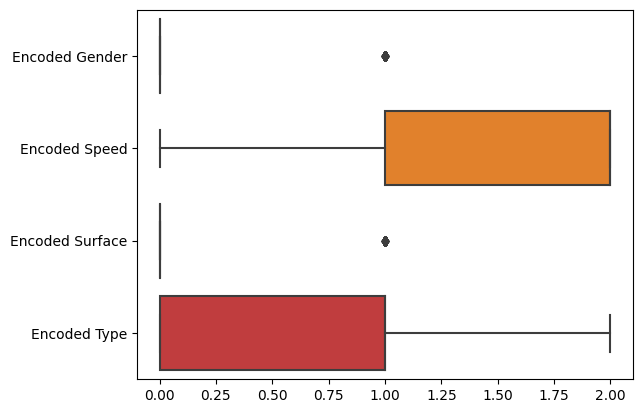

In [38]:
# Perlu revisi
sns.boxplot(data=dataset[['Usia (tahun)', 'Encoded Gender', 'Tinggi Badan (dalam cm)', 'Berat Badan (dalam kg)', 'Encoded Speed', 'Encoded Surface', 'Encoded Type']], orient='h')
plt.show()